<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/Tree_Types_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv("/content/treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.shape

(250000, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [6]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

In [7]:
df["Elevation"].value_counts()

2326    313
2305    300
2952    293
2304    292
2330    287
       ... 
3663      1
3646      1
3676      1
3842      1
1863      1
Name: Elevation, Length: 1983, dtype: int64

In [8]:
df.nunique()

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [9]:
df["Cover_Type"].value_counts(dropna=False)

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

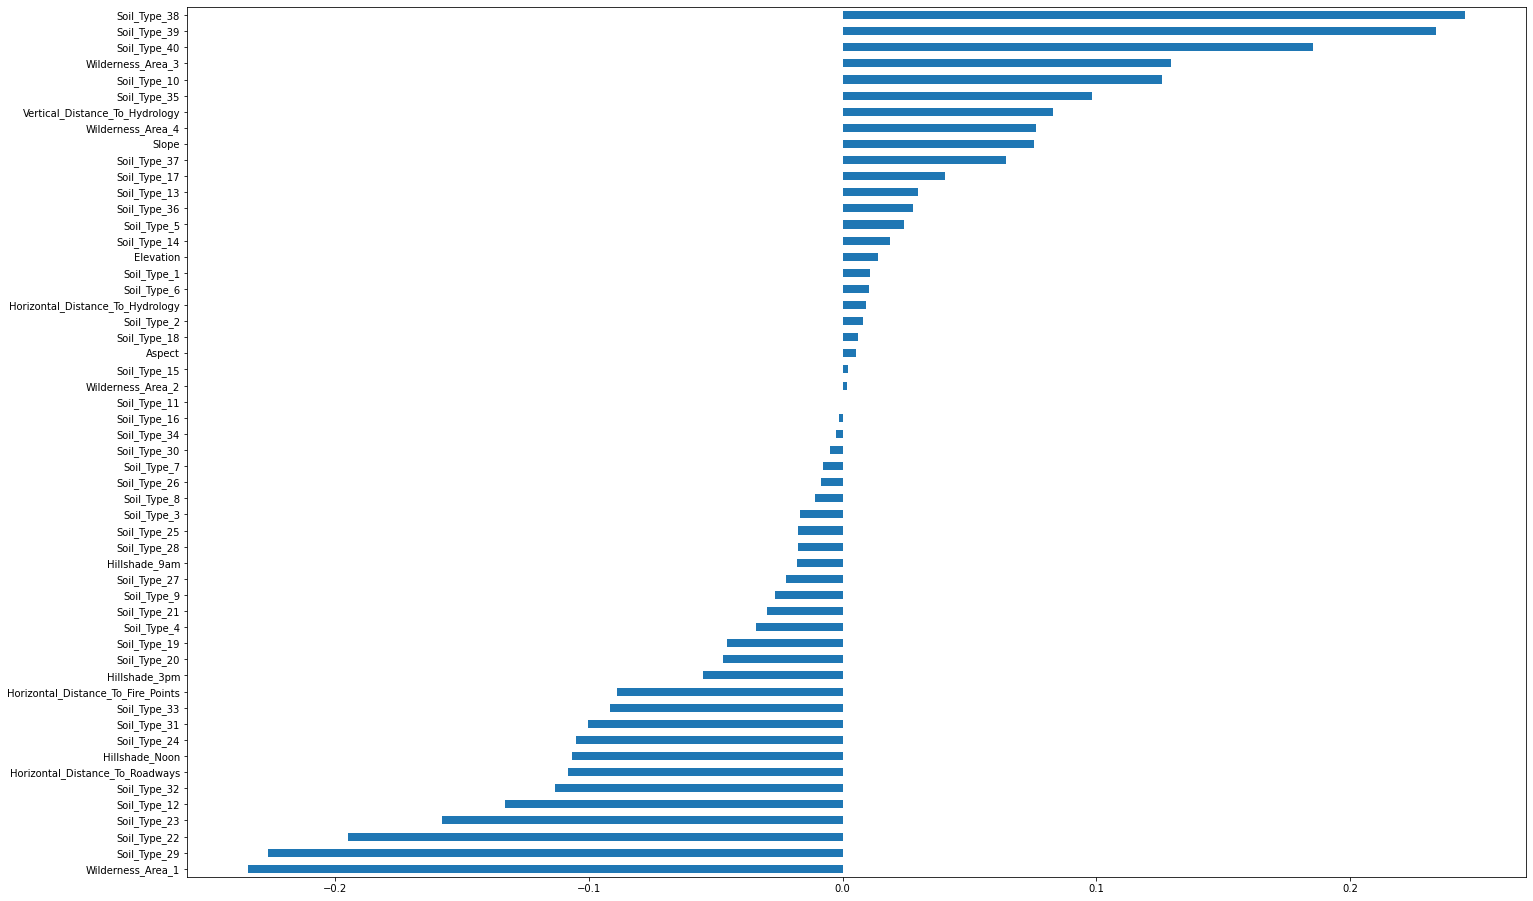

In [10]:
plt.figure(figsize=(24,16));
df.corr()["Cover_Type"].drop("Cover_Type").sort_values().plot.barh()

In [11]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
Elevation,1.000,-0.022,-0.320,0.418,0.123,0.588,0.110,0.224,0.086,0.447,0.333,0.259,0.352,-0.783,-0.192,-0.129,-0.292,-0.100,-0.133,-0.174,0.003,0.004,-0.010,-0.336,-0.033,0.021,0.039,-0.104,-0.003,-0.046,-0.157,-0.031,0.036,0.006,0.021,0.142,0.158,0.086,0.018,0.017,0.033,-0.001,0.170,0.048,0.090,0.171,0.122,0.029,0.119,0.032,0.066,0.315,0.290,0.289,0.014
Aspect,-0.022,1.000,0.037,0.040,0.055,0.042,-0.604,0.322,0.639,-0.073,-0.148,0.029,0.048,0.074,-0.017,-0.020,-0.068,0.014,0.011,-0.005,-0.004,-0.002,-0.016,0.129,-0.033,-0.041,0.034,0.005,-0.003,0.031,0.035,-0.035,0.008,-0.021,0.023,0.010,0.028,0.005,-0.002,-0.001,0.012,0.018,-0.066,-0.089,0.001,0.023,0.021,0.014,-0.017,0.002,-0.041,0.047,-0.045,0.008,0.005
Slope,-0.320,0.037,1.000,-0.063,0.264,-0.280,-0.199,-0.612,-0.326,-0.247,-0.159,-0.071,-0.111,0.295,0.107,-0.091,0.281,0.094,0.088,-0.045,-0.011,-0.014,-0.021,0.261,-0.104,-0.117,0.127,-0.041,0.001,-0.047,-0.113,-0.065,-0.053,-0.066,-0.022,-0.068,-0.182,0.017,0.010,-0.036,0.015,0.027,-0.099,0.119,-0.065,-0.149,0.077,-0.025,-0.046,-0.004,0.001,-0.156,0.054,-0.043,0.075
Horizontal_Distance_To_Hydrology,0.418,0.040,-0.063,1.000,0.649,0.199,-0.027,0.086,0.080,0.150,-0.009,0.089,0.201,-0.239,-0.067,0.029,-0.080,-0.039,-0.009,0.023,0.005,0.001,-0.007,-0.098,0.028,0.032,0.022,-0.084,-0.002,-0.064,-0.131,-0.015,-0.023,-0.053,-0.022,-0.006,-0.080,0.041,0.012,0.036,0.055,0.012,0.024,-0.027,0.060,0.122,0.060,0.071,-0.005,0.072,-0.012,0.138,0.075,0.243,0.009
Vertical_Distance_To_Hydrology,0.123,0.055,0.264,0.649,1.000,0.000,-0.092,-0.133,-0.038,-0.026,-0.119,0.007,0.075,0.029,-0.018,-0.002,0.081,0.004,0.031,0.091,-0.005,-0.008,-0.017,0.027,-0.030,-0.033,0.087,-0.065,-0.002,-0.054,-0.133,-0.038,-0.039,-0.061,-0.018,-0.058,-0.140,0.021,-0.005,-0.011,0.051,0.026,-0.064,0.003,0.007,0.017,0.079,0.031,-0.013,0.011,-0.020,-0.015,0.061,0.223,0.083
Horizontal_Distance_To_Roadways,0.588,0.042,-0.280,0.199,0.000,1.000,0.015,0.241,0.161,0.482,0.382,-0.082,0.121,-0.447,-0.110,-0.083,-0.155,-0.088,-0.085,-0.131,0.017,0.021,-0.018,-0.210,-0.062,0.096,0.004,-0.059,-0.002,-0.005,-0.060,-0.040,0.059,0.041,-0.001,0.107,0.129,0.019,-0.014,0.029,0.024,-0.011,0.272,-0.057,0.026,0.031,0.037,0.030,0.058,0.025,0.057,0.200,0.121,0.131,-0.108
Hillshade_9am,0.110,-0.604,-0.199,-0.027,-0.092,0.015,1.000,-0.016,-0.782,0.095,0.182,-0.006,-0.021,-0.142,0.013,0.062,0.238,0.046,-0.077,0.016,0.001,0.003,0.011,-0.402,0.023,0.044,-0.002,-0.005,-0.001,-0.015,-0.025,0.025,-0.001,0.012,-0.008,-0.003,0.005,-0.047,0.015,0.022,-0.006,-0.047,0.062,0.161,-0.017,0.008,-0.036,0.001,0.034,0.011,0.015,0.012,0.027,-0.009,-0.018
Hillshade_Noon,0.224,0.322,-0.612,0.086,-0.133,0.241,-0.016,1.000,0.614,0.124,-0.002,0.041,0.190,-0.218,-0.033,0.093,-0.106,0.132,-0.094,0.032,0.005,0.007,0.006,-0.286,0.033,0.055,0.006,0.017,-0.002,0.034,0.078,0.026,0.035,0.024,0.023,0.042,0.123,-0.048,0.006,0.054,0.021,0.005,0.016,-0.128,0.036,0.107,-0.006,0.034,0.031,0.023,-0.031,0.102,-0.075,-0.006,-0.107
Hillshade_3pm,0.086,0.639,-0.326,0.080,-0.038,0.161,-0.782,0.614,1.000,0.034,-0.117,0.040,0.134,-0.052,-0.050,0.011,-0.306,0.008,-0.001,0.011,0.003,0.003,-0.003,0.141,0.017,0.012,-0.019,0.020,-0.000,0.037,0.076,0.002,0.027,0.015

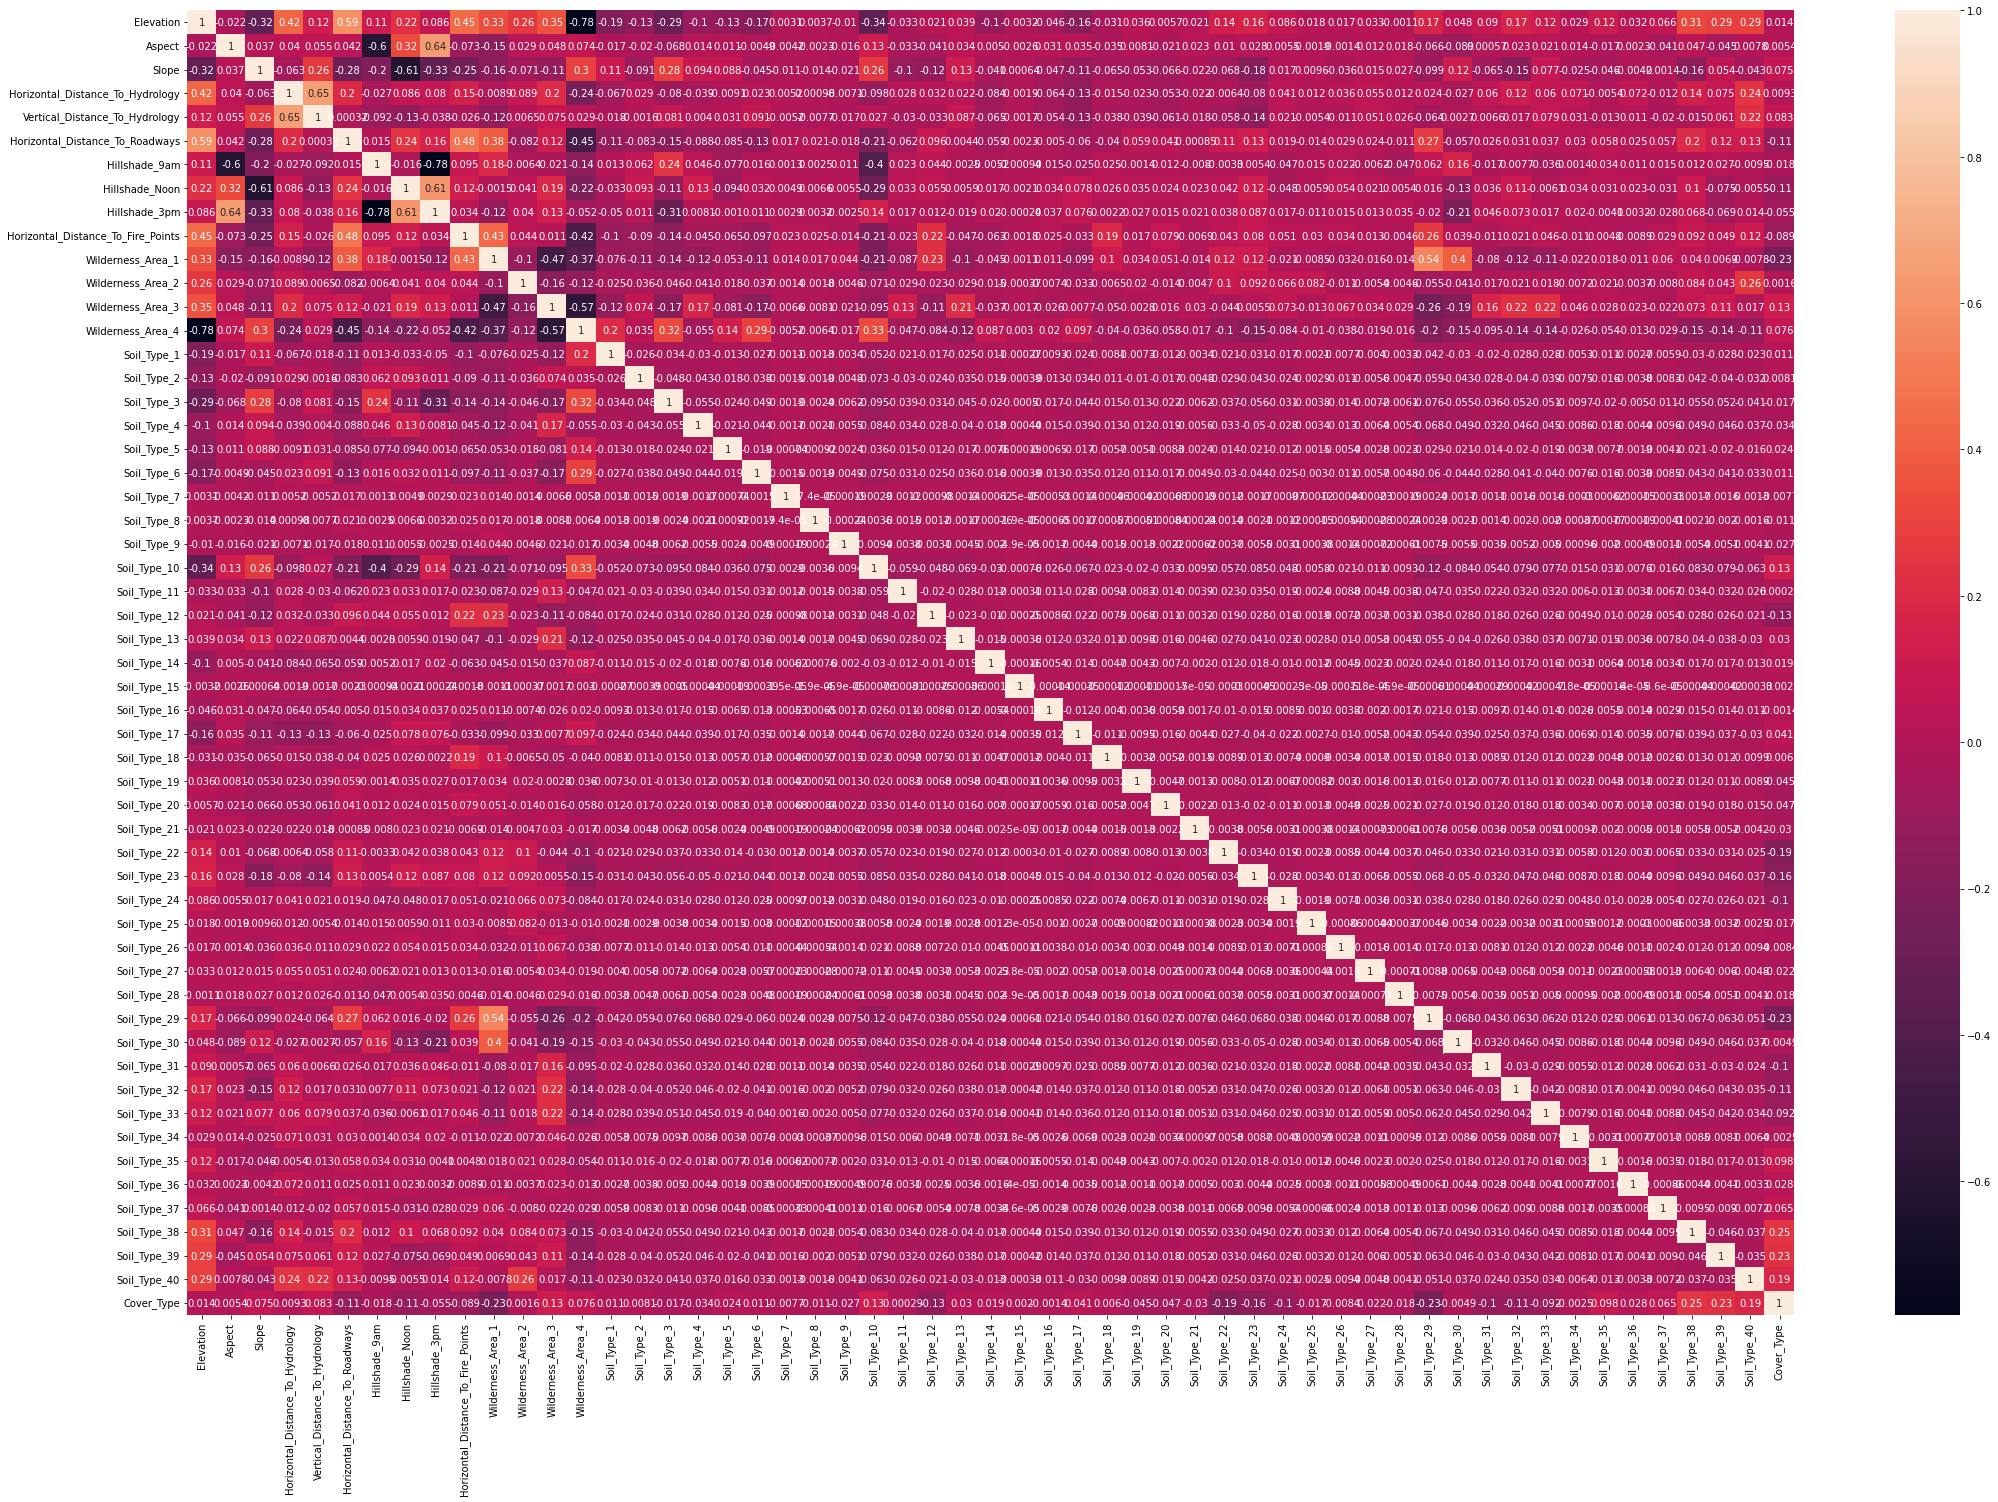

In [12]:
plt.figure(figsize=(36,24))
sns.heatmap(df.corr(), annot=True)

I can see that Hillshade_9am and Hillshade_3pm has strong correlation. I prefer to drop one of these. Also Elavation and Wilderness_Area_4 has strong correlation. However Wilderness area is not a continues variable. Therefore I will keep them. 

In [13]:
df.drop(columns=["Hillshade_3pm"], inplace=True)

In [14]:
df.sample()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
121132,2320,317,28,30,14,732,133,200,776,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


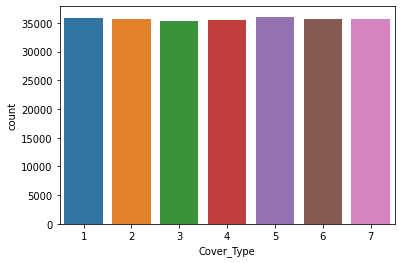

In [15]:
sns.countplot(df["Cover_Type"])

I can easily see that target label has a balanced data.

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [16]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0
Soil_Type_12                          0


#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

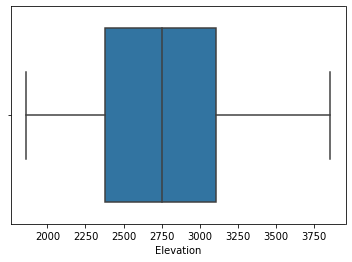

In [17]:
sns.boxplot(df["Elevation"]);

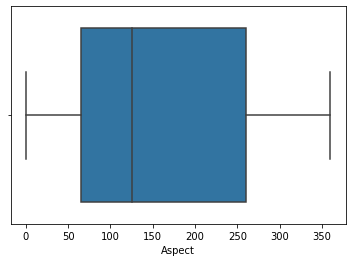

In [18]:
sns.boxplot(df["Aspect"]);

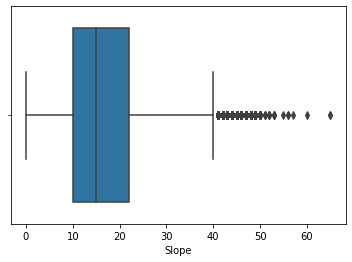

In [19]:
sns.boxplot(df["Slope"]);

In [20]:
upper = df.Slope.quantile(0.996)
upper

40.0

In [21]:
df[df.Slope>40].Slope.count()

850

In [22]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

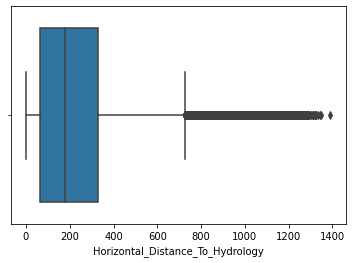

In [23]:
sns.boxplot(df["Horizontal_Distance_To_Hydrology"]);

In [24]:
df[df["Horizontal_Distance_To_Hydrology"]>730].Slope.count()

8022

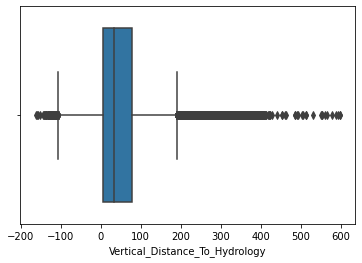

In [25]:
sns.boxplot(df["Vertical_Distance_To_Hydrology"]);

In [26]:
df[df["Vertical_Distance_To_Hydrology"]>190].Slope.count()

9087

In [27]:
df[df["Vertical_Distance_To_Hydrology"]<-110].Slope.count()

87

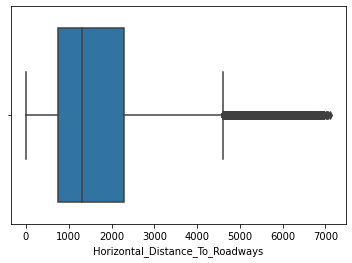

In [28]:
sns.boxplot(df["Horizontal_Distance_To_Roadways"]);

In [29]:
df[df["Horizontal_Distance_To_Roadways"]>4700].Slope.count()

11712

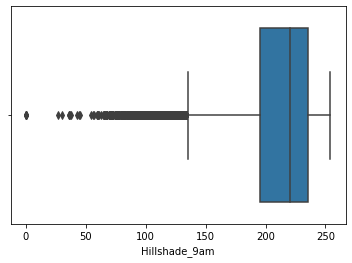

In [30]:
sns.boxplot(df["Hillshade_9am"]);

In [31]:
df[df["Hillshade_9am"]<140].Slope.count()

7299

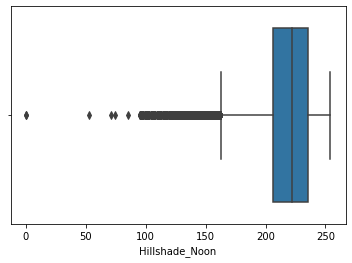

In [32]:
sns.boxplot(df["Hillshade_Noon"]);

In [33]:
df[df["Hillshade_Noon"]<160].Slope.count()

4733

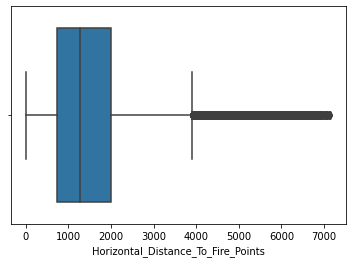

In [34]:
sns.boxplot(df["Horizontal_Distance_To_Fire_Points"]);

In [35]:
df[df["Horizontal_Distance_To_Fire_Points"]>3900].Slope.count()

10486

ValueError: ignored

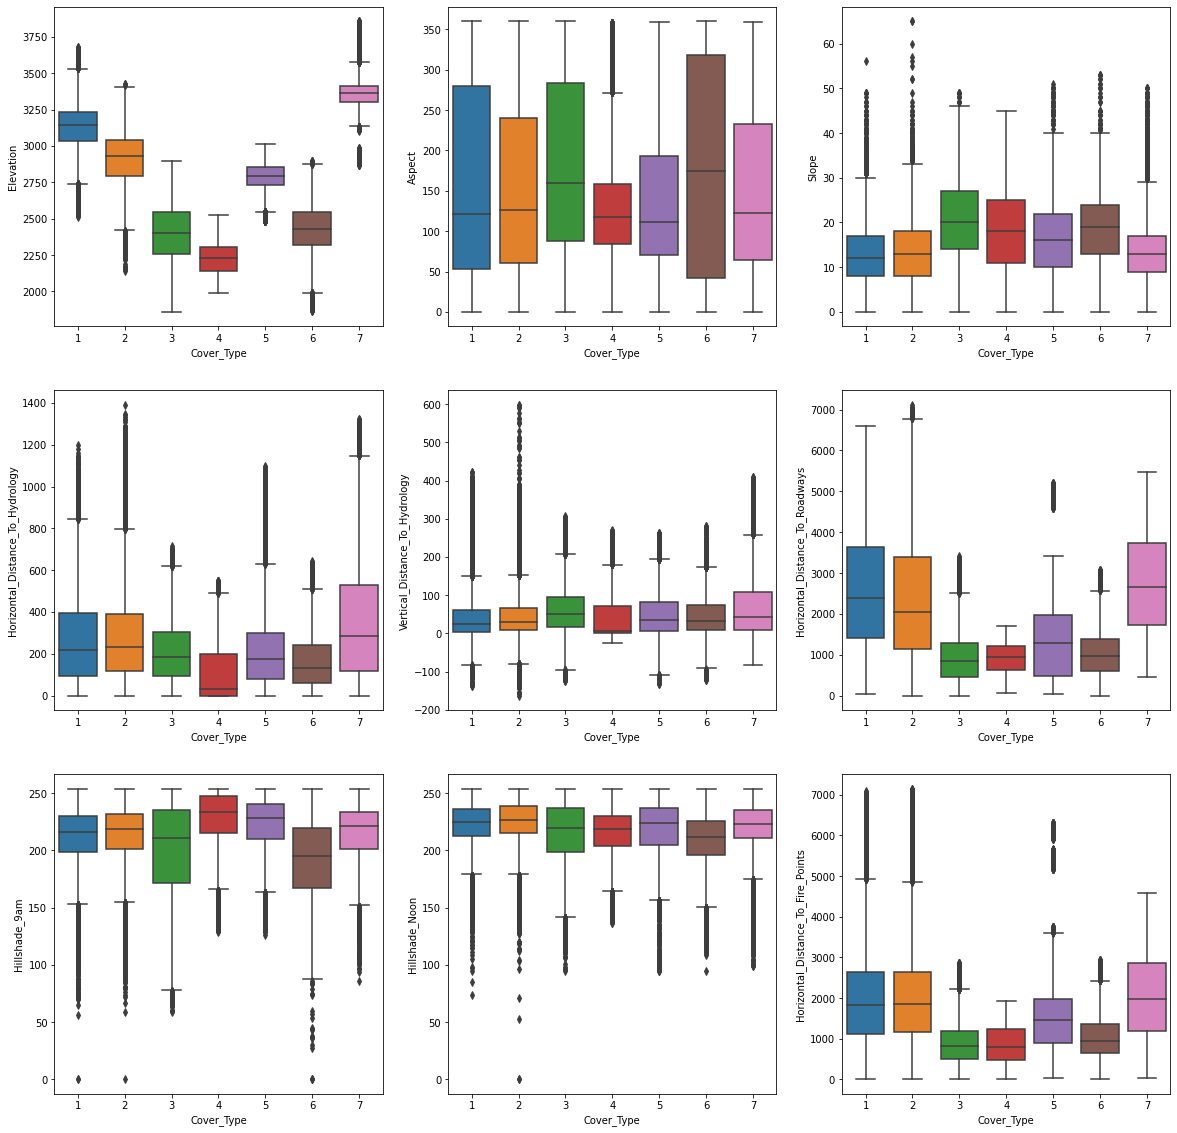

In [41]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Cover_Type":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Cover_Type',y=feature,data=df)

### Deal with Outliers

#### *ii. Drop Outliers*

In [36]:
# I decided not to drop the outliers. Most of the outliers have a insignificant portion of the whole data. Moreover the outliers have not extreme or meaningless values.

### Now, let's take a closer look at correlation of continuous columns.

In [38]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


NameError: ignored

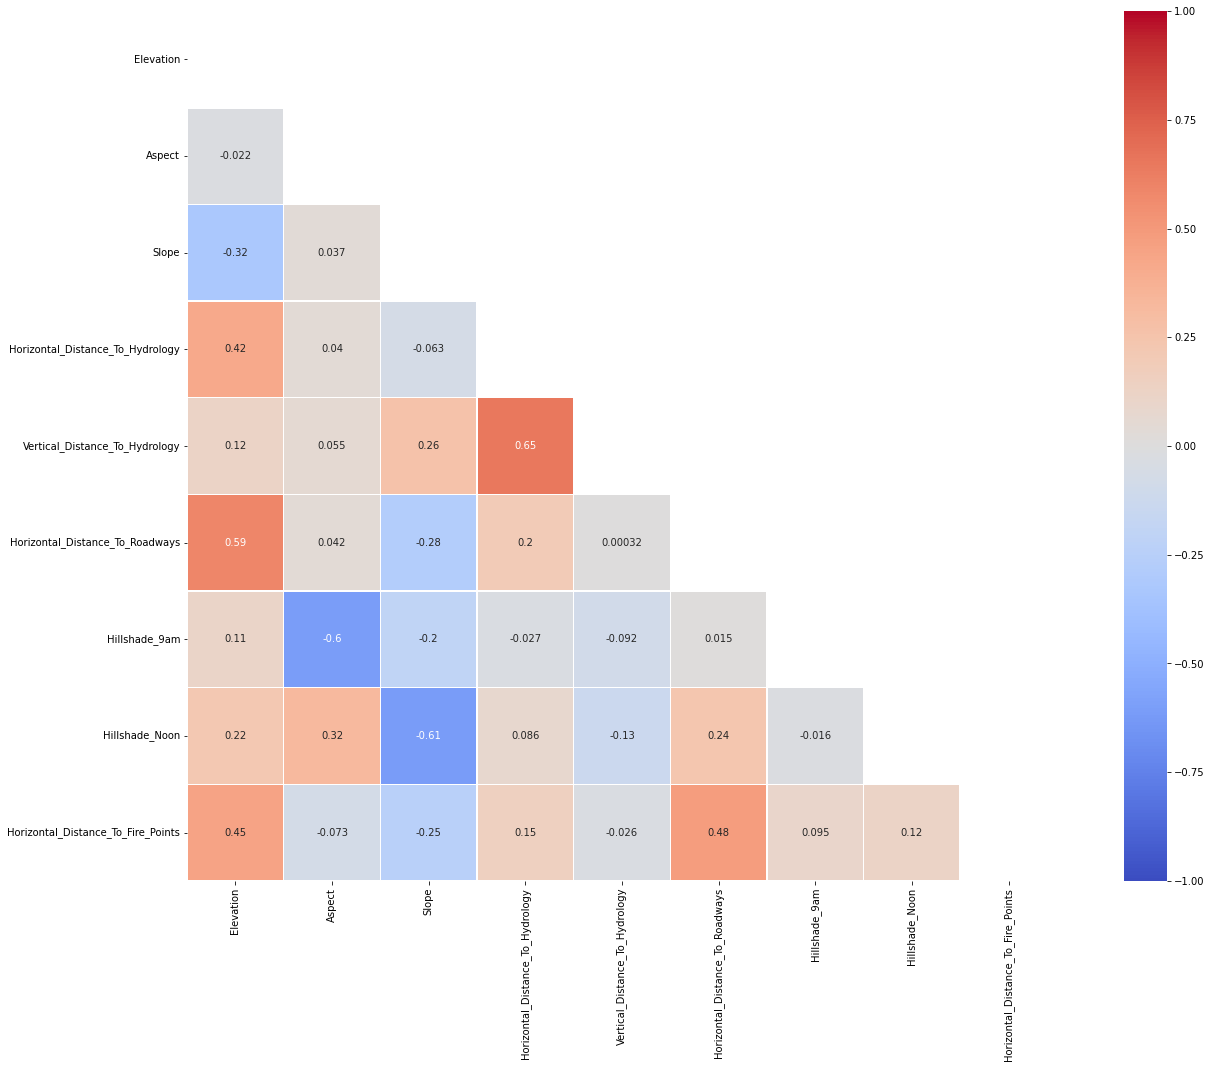

In [43]:
corr_matrix = df[numeric].corr()
mask = np.triu(np.ones_like(corr_matrix))
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix,mask = mask, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [44]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type'], dtype='object')

In [45]:
df["Hypotenuse_Horizontal_And_Vertical_Distances_To_Hydrology"] = np.sqrt(np.square(df["Horizontal_Distance_To_Hydrology"])+(np.square(df["Vertical_Distance_To_Hydrology"])))
df["Hypotenuse_Horizontal_And_Vertical_Distances_To_Hydrology"]

0         217.366
1         139.843
2         361.292
3         321.753
4         520.551
           ...   
249995     51.865
249996    290.878
249997      0.000
249998      0.000
249999   1154.671
Name: Hypotenuse_Horizontal_And_Vertical_Distances_To_Hydrology, Length: 250000, dtype: float64

In [46]:
df["Average_Horizantal Distances_To_Hydrology_And_Roadways"]= (df["Horizontal_Distance_To_Hydrology"]+df["Horizontal_Distance_To_Roadways"])/2
df["Average_Horizantal Distances_To_Hydrology_And_Roadways"]

0        1228.500
1        1934.000
2        2357.500
3         795.000
4         538.500
           ...   
249995    258.000
249996   1139.000
249997    714.500
249998    674.500
249999   3108.500
Name: Average_Horizantal Distances_To_Hydrology_And_Roadways, Length: 250000, dtype: float64

In [47]:
df["Average_Of_Elevation_And_Vertical_Distance_To_Hydrology"] = (df["Elevation"]+df["Vertical_Distance_To_Hydrology"])/2
df["Average_Of_Elevation_And_Vertical_Distance_To_Hydrology"]

0        1372.000
1        1654.500
2        1693.500
3        1511.000
4        1683.000
           ...   
249995   1064.500
249996   1509.500
249997   1168.000
249998   1281.500
249999   2015.500
Name: Average_Of_Elevation_And_Vertical_Distance_To_Hydrology, Length: 250000, dtype: float64

In [48]:
df.drop(columns=["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Hydrology"], axis=1, inplace=True)

In [50]:
df.sample()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Horizontal_And_Vertical_Distances_To_Hydrology,Average_Horizantal Distances_To_Hydrology_And_Roadways,Average_Of_Elevation_And_Vertical_Distance_To_Hydrology
99280,2385,121,26,365,252,207,1920,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,274.758,299.500,1264.500


In [49]:
df.shape

(250000, 55)

In [51]:
df = df[~df.duplicated()]
df.shape

(247343, 55)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [53]:
X=df.drop("Cover_Type", axis=1)
y=df["Cover_Type"]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=5)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [70]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [60]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
lsvc_model = LinearSVC(random_state=5, max_iter = 2000)
lsvc_model.fit(X_train_scaled, y_train)
y_pred_test = lsvc_model.predict(X_test_scaled)
y_pred_train = lsvc_model.predict(X_train_scaled)


In [63]:
eval_metric(lsvc_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[5931 1370   10    0  583   84 1137]
 [2221 4247  218    4 1770  370   63]
 [   0   23 4566 1177  544 2490    0]
 [   0    0  490 7746    0  355    0]
 [ 291 1216  667    0 6196  485    0]
 [   1  317 1388  967  965 5041    0]
 [ 926    2   36    0   70    0 7869]]
              precision    recall  f1-score   support

           1       0.63      0.65      0.64      9115
           2       0.59      0.48      0.53      8893
           3       0.62      0.52      0.56      8800
           4       0.78      0.90      0.84      8591
           5       0.61      0.70      0.65      8855
           6       0.57      0.58      0.58      8679
           7       0.87      0.88      0.88      8903

    accuracy                           0.67     61836
   macro avg       0.67      0.67      0.67     61836
weighted avg       0.67      0.67      0.67     61836


Train_Set
[[17254  4092    24     0  1717   264  3369]
 [ 6608 12903   634    16  5379  1144   203]
 [    0    64 13205  3687 

In [64]:
LSVC_Score = lsvc_model.score(X_test_scaled,y_test)

0.6726825797270198

In [191]:
LSVC_Score = 0.6726825797270198

In [196]:
LSVC_Score_train = 0.67

In [68]:
from sklearn.ensemble import BaggingClassifier

In [71]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

TEST REPORT
[[6247 1496   18    0  342   54  958]
 [1984 4822  208    2 1503  321   53]
 [   0   84 4582 1170  241 2723    0]
 [   0    0  376 7880    0  335    0]
 [  91 1281  307    0 6925  251    0]
 [   0  140 1509  665  192 6173    0]
 [1016    4    5    0   32    0 7846]]
              precision    recall  f1-score   support

           1       0.67      0.69      0.68      9115
           2       0.62      0.54      0.58      8893
           3       0.65      0.52      0.58      8800
           4       0.81      0.92      0.86      8591
           5       0.75      0.78      0.77      8855
           6       0.63      0.71      0.67      8679
           7       0.89      0.88      0.88      8903

    accuracy                           0.72     61836
   macro avg       0.72      0.72      0.72     61836
weighted avg       0.72      0.72      0.72     61836




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[18003  4635    30     0  1004   135  2913]
 

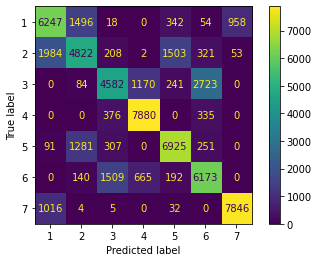

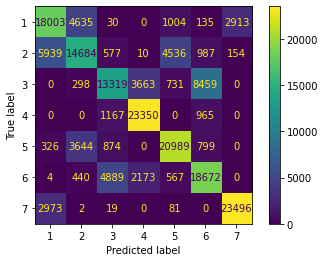

In [73]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

In [75]:
Bagging_SVC_Score = model_baggingSVC.score(X_test_scaled,y_test)
Bagging_SVC_Score

0.719241218707549

In [197]:
Bagging_SVC_Score_train = 0.71

### I drop the model computional complexity with bagging and that gives a better accuracy which was 67 in the previous LinearSVC model. It takes approximately 10 minutes to get the score in the above model.

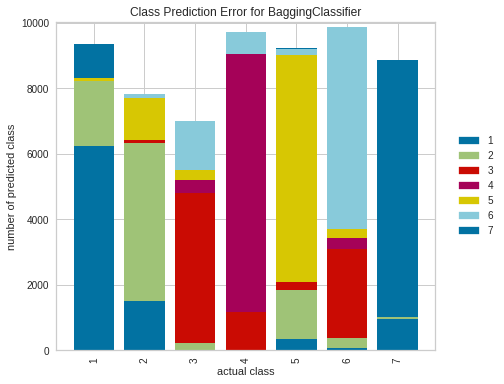

In [76]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(model_baggingSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [216]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [218]:
dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[7782 1066    4    0   51   13  199]
 [1144 7268  108    1  257   95   20]
 [   0   93 8277   92   25  313    0]
 [   0    0   35 8528    0   28    0]
 [  14  116   21    0 8690   14    0]
 [   3   60  285   40    7 8284    0]
 [ 119   13    0    0    2    0 8769]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86      9115
           2       0.84      0.82      0.83      8893
           3       0.95      0.94      0.94      8800
           4       0.98      0.99      0.99      8591
           5       0.96      0.98      0.97      8855
           6       0.95      0.95      0.95      8679
           7       0.98      0.98      0.98      8903

    accuracy                           0.93     61836
   macro avg       0.93      0.93      0.93     61836
weighted avg       0.93      0.93      0.93     61836


Train_Set
[[26720     0     0     0     0     0     0]
 [    0 26887     0     0     0     0     0]
 [    0     0 26470     0 

In [219]:
DT_Score = dt_model.score(X_test, y_test)
DT_Score

0.9314638721780193

In [220]:
DT_Score_train= dt_model.score(X_train, y_train)
DT_Score_train

1.0

In [231]:
y_pred_test = dt_model.predict(X_test)
y_pred_train = dt_model.predict(X_train)

In [235]:
DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_test

0.9317285084465226

In [236]:
DT_f1_train = f1_score(y_train, y_pred_train, average='macro') 
DT_f1_train

1.0

### I get a relatively high score. However, I get a perfect score from train set. Therefore, model have have an overfitting problem. I will change some parameters to overcome with overfitting.

In [243]:
dt_model_arranged = DecisionTreeClassifier(random_state=5, max_depth=22)
dt_model_arranged.fit(X_train, y_train)
eval_metric(dt_model_arranged, X_train, y_train, X_test, y_test)

Test_Set
[[7696 1066    6    0  106   12  229]
 [1148 7031  118    1  459  115   21]
 [   1   94 8199   94   38  374    0]
 [   0    0   39 8531    0   21    0]
 [  16   81   20    0 8715   23    0]
 [   4   37  282   44   31 8281    0]
 [ 112   10    0    0    5    0 8776]]
              precision    recall  f1-score   support

           1       0.86      0.84      0.85      9115
           2       0.85      0.79      0.82      8893
           3       0.95      0.93      0.94      8800
           4       0.98      0.99      0.99      8591
           5       0.93      0.98      0.96      8855
           6       0.94      0.95      0.95      8679
           7       0.97      0.99      0.98      8903

    accuracy                           0.93     61836
   macro avg       0.93      0.93      0.93     61836
weighted avg       0.92      0.93      0.92     61836


Train_Set
[[25924   408     3     0   191    11   183]
 [  542 25282    72     0   824   161     6]
 [    1    51 26015     5 

In [244]:
Arranged_DT_Score = dt_model_arranged.score(X_test, y_test)
Arranged_DT_Score

0.9254964745455722

In [245]:
Arranged_DT_Score_train = dt_model_arranged.score(X_train, y_train)
Arranged_DT_Score_train

0.9826691176074218

In [246]:
y_pred_test = dt_model_arranged.predict(X_test)
y_pred_train = dt_model_arranged.predict(X_train)

In [252]:
Arranged_DT_f1_test = f1_score(y_test, y_pred_test, average="macro")
Arranged_DT_f1_test

0.9253576330606911

In [253]:
Arranged_DT_f1_train = f1_score(y_train, y_pred_train, average="macro")
Arranged_DT_Score_train

0.9826691176074218

####After changing max_depth parameter, gap between the train and test scores is decresed. However, it is still high and I will try BaggingClassifier.

In [254]:
BaggingDT_model = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=10, random_state = 5)

BaggingDT_model .fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.1,
                  n_jobs=-1, random_state=5)

In [255]:
y_pred_test = BaggingDT_model.predict(X_test)
y_pred_train = BaggingDT_model.predict(X_train)

In [256]:
BaggingDT_model_accuracy_test = accuracy_score(y_test, y_pred_test)
BaggingDT_model_accuracy_train = accuracy_score(y_train, y_pred_train)

BaggingDT_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
BaggingDT_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

print(" Accuracy_test: ", BaggingDT_model_accuracy_test,"\n","Accuracy_train: ", BaggingDT_model_accuracy_train,"\n",  "F1_test: ", BaggingDT_model_f1_test, "\n","F1_train: ",  BaggingDT_model_f1_train)

 Accuracy_test:  0.9028074260948314 
 Accuracy_train:  0.9226013034548561 
 F1_test:  0.9018158086965639 
 F1_train:  0.9221813680676861


TEST REPORT
              precision    recall  f1-score   support

           1       0.81      0.83      0.82      9115
           2       0.84      0.71      0.77      8893
           3       0.91      0.91      0.91      8800
           4       0.97      0.99      0.98      8591
           5       0.92      0.98      0.95      8855
           6       0.91      0.92      0.91      8679
           7       0.96      0.98      0.97      8903

    accuracy                           0.90     61836
   macro avg       0.90      0.90      0.90     61836
weighted avg       0.90      0.90      0.90     61836




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.84      0.86      0.85     26720
           2       0.88      0.77      0.82     26887
           3       0.93      0.93      0.93     26470
           4       0.97      0.99      0.98     25482
           5       0.94      0.99      0.9

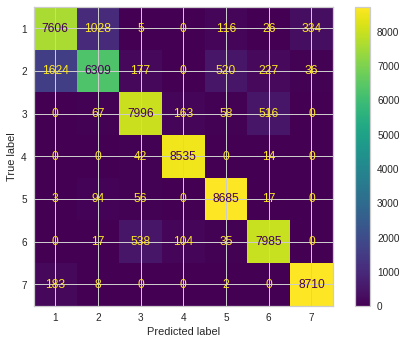

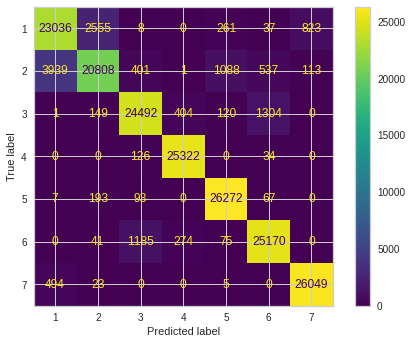

In [257]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(BaggingDT_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(BaggingDT_model, X_train, y_train);

In [258]:
Bagging_DT_Score = BaggingDT_model.score(X_test, y_test)
Bagging_DT_Score

0.9028074260948314

In [259]:
Bagging_DT_Score_train = BaggingDT_model.score(X_train, y_train)
Bagging_DT_Score_train

0.9226013034548561

#### With Bagging method I can fix the overfitting problem of the model. Diffence between the train and test scores decresed to 2 points. 

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf_model = RandomForestClassifier(random_state=5, max_depth=20)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[8027  796    7    0   98   18  169]
 [ 770 7490  134    0  337  144   18]
 [   0   10 8319   90   45  336    0]
 [   0    0    6 8574    0   11    0]
 [   0    8   14    0 8827    6    0]
 [   0    4   88   43   20 8524    0]
 [  28    0    0    0    5    0 8870]]
              precision    recall  f1-score   support

           1       0.91      0.88      0.89      9115
           2       0.90      0.84      0.87      8893
           3       0.97      0.95      0.96      8800
           4       0.98      1.00      0.99      8591
           5       0.95      1.00      0.97      8855
           6       0.94      0.98      0.96      8679
           7       0.98      1.00      0.99      8903

    accuracy                           0.95     61836
   macro avg       0.95      0.95      0.95     61836
weighted avg       0.95      0.95      0.95     61836


Train_Set
[[25865   523     6     0   182    10   134]
 [  409 25761    73     1   455   183     5]
 [    0     1 25824    83 

In [262]:
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
rf_model_accuracy_test = accuracy_score(y_test, y_pred_test)
rf_model_accuracy_train = accuracy_score(y_train, y_pred_train)

rf_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
rf_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

In [263]:
print(" Accuracy_test: ", rf_model_accuracy_test,"\n","Accuracy_train: ", rf_model_accuracy_train,"\n",  "F1_test: ", rf_model_f1_test, "\n","F1_train: ",  rf_model_f1_train)

 Accuracy_test:  0.9481693511870108 
 Accuracy_train:  0.9849062299535867 
 F1_test:  0.9479539725178705 
 F1_train:  0.9849650435492932


In [264]:
RF_Score = rf_model.score(X_test, y_test)
RF_Score

0.9481693511870108

In [265]:
RF_Score_train = rf_model.score(X_train, y_train)
RF_Score_train

0.9849062299535867

TEST REPORT
              precision    recall  f1-score   support

           1       0.91      0.88      0.89      9115
           2       0.90      0.84      0.87      8893
           3       0.97      0.95      0.96      8800
           4       0.98      1.00      0.99      8591
           5       0.95      1.00      0.97      8855
           6       0.94      0.98      0.96      8679
           7       0.98      1.00      0.99      8903

    accuracy                           0.95     61836
   macro avg       0.95      0.95      0.95     61836
weighted avg       0.95      0.95      0.95     61836




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.98      0.97      0.98     26720
           2       0.98      0.96      0.97     26887
           3       1.00      0.98      0.99     26470
           4       0.99      1.00      1.00     25482
           5       0.97      1.00      0.9

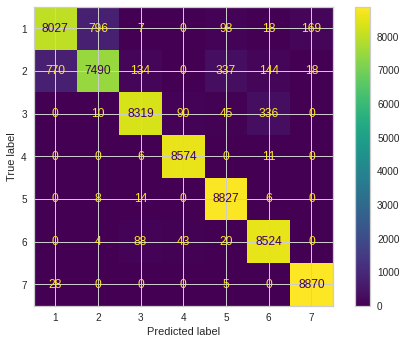

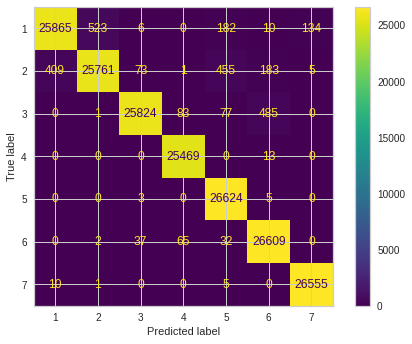

In [184]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(rf_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(rf_model, X_train, y_train);

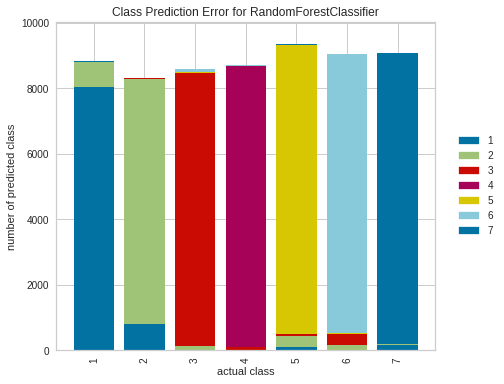

In [185]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### I can see that model have relatively low recall scores in class 1 and class 2. Model have more type1 and type2 errors in these classes according to the general performance of the model.  

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [266]:
from xgboost import XGBClassifier

In [267]:
xgb_model = XGBClassifier(random_state=5).fit(X_train, y_train) 

In [268]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[6108 1246    8    0  485   40 1228]
 [2078 4197  185    1 1935  372  125]
 [   0    1 5823  708  215 2053    0]
 [   0    0  282 8222    0   87    0]
 [  21  245  306    0 8032  251    0]
 [   0   10 1717  341  220 6391    0]
 [ 452    0    0    0    8    0 8443]]
              precision    recall  f1-score   support

           1       0.71      0.67      0.69      9115
           2       0.74      0.47      0.58      8893
           3       0.70      0.66      0.68      8800
           4       0.89      0.96      0.92      8591
           5       0.74      0.91      0.81      8855
           6       0.70      0.74      0.72      8679
           7       0.86      0.95      0.90      8903

    accuracy                           0.76     61836
   macro avg       0.76      0.76      0.76     61836
weighted avg       0.76      0.76      0.76     61836


Train_Set
[[17796  3773    15     0  1428   111  3597]
 [ 6113 13232   503    11  5518  1183   327]
 [    0     2 17167  2181 

In [269]:
XGBoost_Score = xgb_model.score(X_test,y_test)
XGBoost_Score

0.7635681480043988

In [270]:
XGBoost_Score_train = xgb_model.score(X_train, y_train)
XGBoost_Score_train

0.7630008571105134

In [271]:
y_pred_test = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)
xgb_model_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_model_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_model_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_model_f1_train = f1_score(y_train, y_pred_train, average='macro')

print(" Accuracy_test: ", xgb_model_accuracy_test,"\n","Accuracy_train: ", xgb_model_accuracy_train,"\n",  "F1_test: ", xgb_model_f1_test, "\n","F1_train: ",  xgb_model_f1_train)

 Accuracy_test:  0.7635681480043988 
 Accuracy_train:  0.7630008571105134 
 F1_test:  0.7564127237611729 
 F1_train:  0.7568464554465572


TEST REPORT
              precision    recall  f1-score   support

           1       0.71      0.67      0.69      9115
           2       0.74      0.47      0.58      8893
           3       0.70      0.66      0.68      8800
           4       0.89      0.96      0.92      8591
           5       0.74      0.91      0.81      8855
           6       0.70      0.74      0.72      8679
           7       0.86      0.95      0.90      8903

    accuracy                           0.76     61836
   macro avg       0.76      0.76      0.76     61836
weighted avg       0.76      0.76      0.76     61836




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.70      0.67      0.68     26720
           2       0.74      0.49      0.59     26887
           3       0.70      0.65      0.67     26470
           4       0.88      0.96      0.92     25482
           5       0.74      0.91      0.8

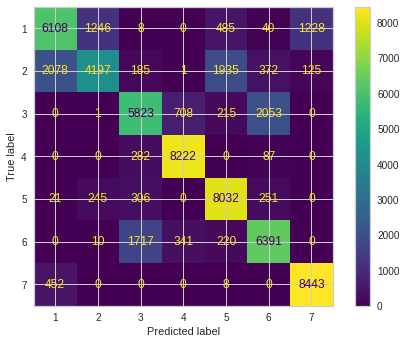

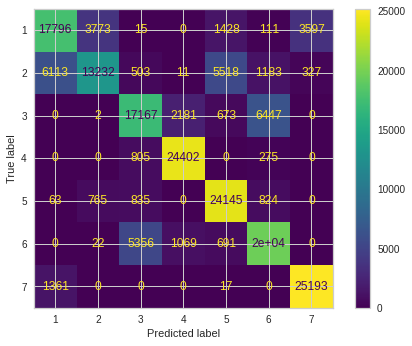

In [272]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_model, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_model, X_train, y_train);

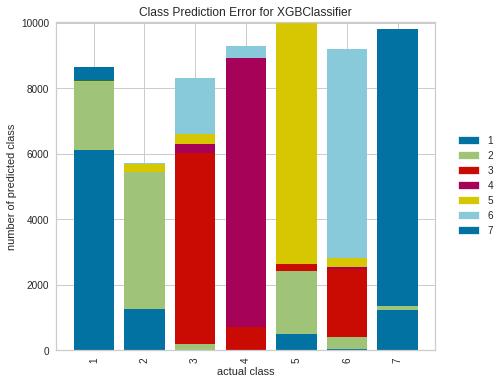

In [189]:
visualizer = ClassPredictionError(xgb_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

Thanks to the balanced data accuracy score is a good performance metric. According to the accuracy test scores Random Forest algorithm achieved the highest prediction performance. To overcome with the overfitting problem I arrnged the max_depth parameter to 20. Random Forest performed well both in train and test sets. On the other hand Decision Tree Model (with default parameters) performs second in test sets. However it has an overfitting problem. I also arranged max_depth parameter for Decision Tree Model but still have some overfitting problem. Surprisingly, XGBoost did not perform well enough. The other models relatively have low performance. In conclusion, I choose the Random Forest. 

Text(0.5, 1.0, 'Test Accuracy Scores of Different Models')

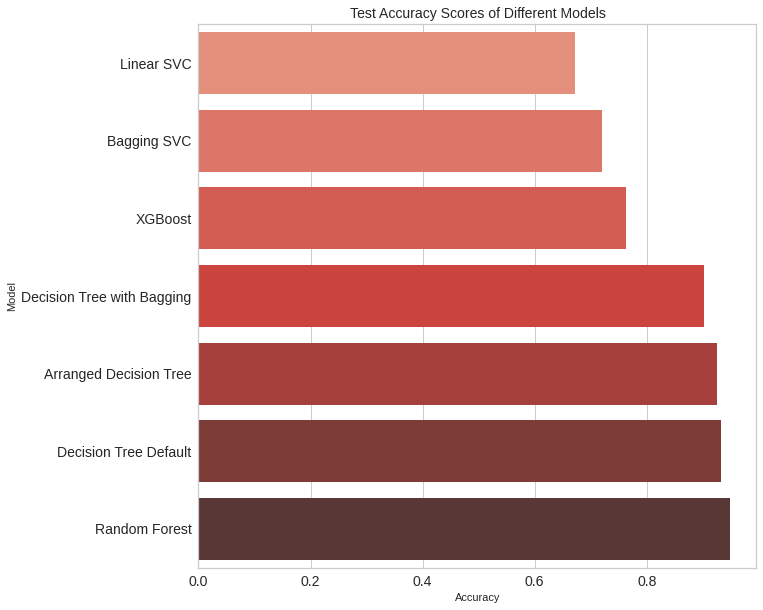

In [282]:
accuracy_compare = pd.DataFrame({"Model": ["Linear SVC", "Bagging SVC", "Decision Tree Default", "Arranged Decision Tree", "Decision Tree with Bagging", "Random Forest", "XGBoost"],
                        "Accuracy": [LSVC_Score, Bagging_SVC_Score, DT_Score, Arranged_DT_Score, Bagging_DT_Score, RF_Score, XGBoost_Score]})

accuracy_compare = accuracy_compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=accuracy_compare, palette="Reds_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Scores of Different Models", size=14)

Text(0.5, 1.0, 'Train Accuracy Scores of Different Models')

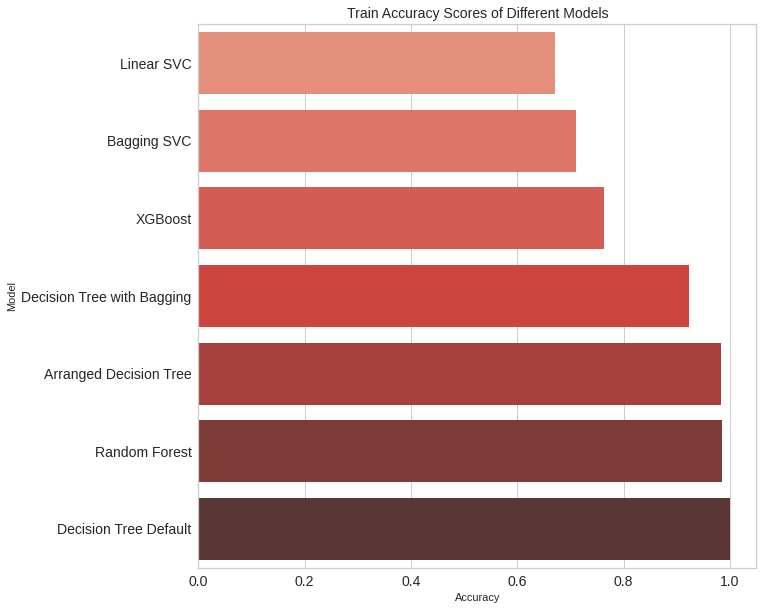

In [281]:
accuracy_compare_train = pd.DataFrame({"Model": ["Linear SVC", "Bagging SVC", "Decision Tree Default", "Arranged Decision Tree", "Decision Tree with Bagging", "Random Forest", "XGBoost"],
                        "Accuracy": [LSVC_Score_train, Bagging_SVC_Score_train, DT_Score_train, Arranged_DT_Score_train, Bagging_DT_Score_train, RF_Score_train, XGBoost_Score_train]})

accuracy_compare_train = accuracy_compare_train.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=accuracy_compare_train, palette="Reds_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Train Accuracy Scores of Different Models", size=14)

# F1 Score Comparison

F1 scores are very similar to the accuracy scores. According to the F1 test scores Random Forest algorithm achieved the highest prediction performance. To overcome with the overfitting problem I arrnged the max_depth parameter to 20 in Random Forest. Moreover, Random Forest performed well both in train and test sets. On the other hand Decision Tree Model (with default parameters) performs second in test sets. However it has an overfitting problem. I also arranged max_depth parameter for Decision Tree Model but still have some overfitting problem. Surprisingly, XGBoost did not perform well enough. The other models relatively have low performance. In conclusion, I choose the Random Forest. 

Text(0.5, 1.0, 'Test F1 Scores of Different Models')

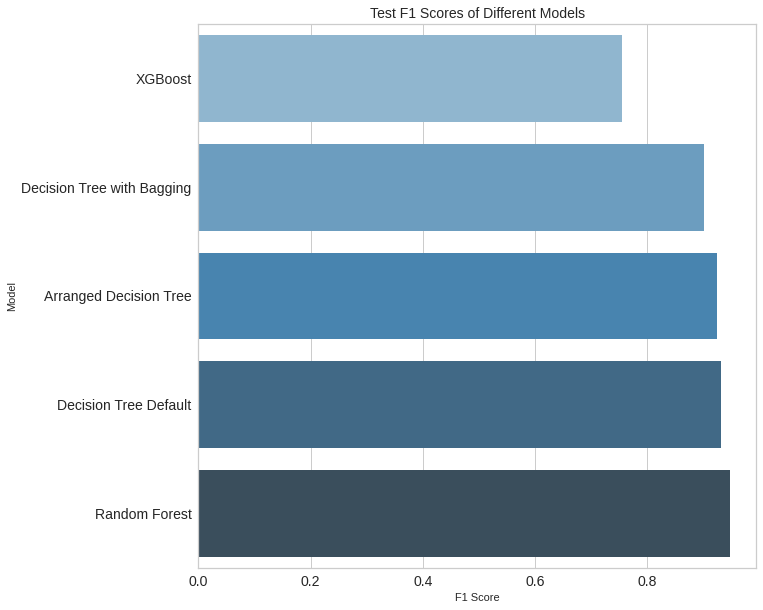

In [280]:
f1_compare_test = pd.DataFrame({"Model": ["Decision Tree Default", "Arranged Decision Tree", "Decision Tree with Bagging", "Random Forest", "XGBoost"],
                        "F1 Score": [DT_f1_test, Arranged_DT_f1_test, BaggingDT_model_f1_test, rf_model_f1_test, xgb_model_f1_test]})

f1_compare_test = f1_compare_test.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=f1_compare_test, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Scores of Different Models", size=14)

Text(0.5, 1.0, 'Test F1 Scores of Different Models')

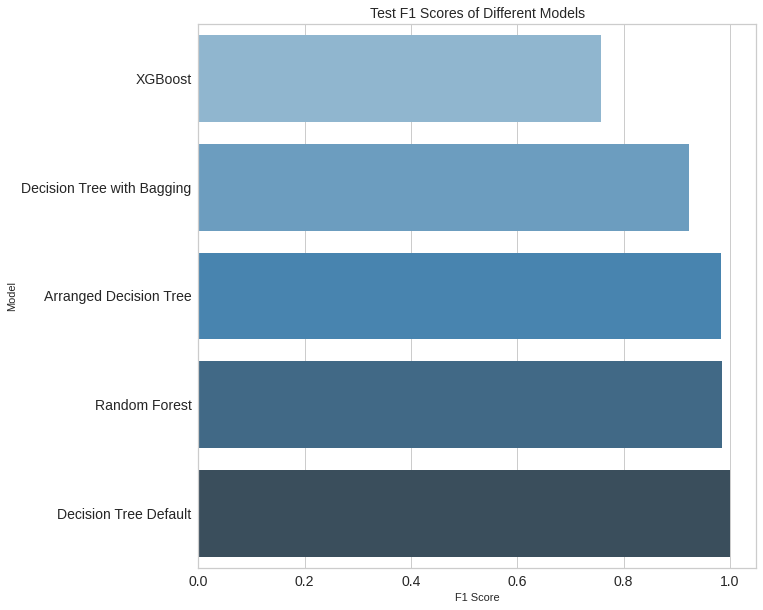

In [283]:
f1_compare_train = pd.DataFrame({"Model": ["Decision Tree Default", "Arranged Decision Tree", "Decision Tree with Bagging", "Random Forest", "XGBoost"],
                        "F1 Score": [DT_f1_train, Arranged_DT_f1_train, BaggingDT_model_f1_train, rf_model_f1_train, xgb_model_f1_train]})

f1_compare_train = f1_compare_train.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=f1_compare_train, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Scores of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___